In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import statsmodels.api as sm
import scipy
import seaborn as sns
import re
from collections import defaultdict
from glob import glob

# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re
plt.rc( 'font', family = 'serif')

In [154]:
mpi_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_mpi\.csv')
charm_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_charm\.csv')
data_basedir = '../data/stencil/2021-08-26_scaling'
strong_dir = f'{data_basedir}/strong_scaling_results'
weak_dir = f'{data_basedir}/weak_scaling_results'
print(strong_dir)
strong_files = glob(f'{strong_dir}/*')
weak_files = glob(f'{weak_dir}/*')

../data/stencil/2021-08-26_scaling/strong_scaling_results


In [3]:
strong_df = None
for file in strong_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
    df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    df['Num Processes'] = nprocs
    # Get the mean for times across the 100 iterations
    df = df.groupby('Num Processes').mean().reset_index(drop=False)
    df['framework'] = framework
    if strong_df is None:
        strong_df = df.copy(deep=True)
    else:
        strong_df = pd.concat([strong_df, df]).reset_index(drop=True)
        
strong_df['Communication Time'] /= 1000

NameError: name 'strong_files' is not defined

[Text(6, 0, '6'),
 Text(12, 0, '12'),
 Text(24, 0, '24'),
 Text(48, 0, '48'),
 Text(96, 0, '96'),
 Text(192, 0, '192'),
 Text(384, 0, '384'),
 Text(768, 0, '768')]

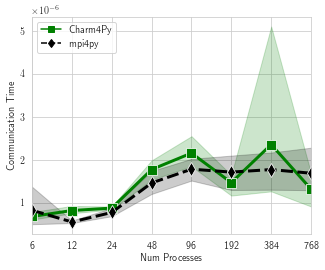

In [174]:
# for np, df in sorted(strong_dfs.items(), key=lambda x: int(x[0])):
#     charm_mean = df[df['framework'] == 'Charm4Py']['Iteration Time'].mean()
#     mpi_mean = df[df['framework'] == 'mpi4py']['Iteration Time'].mean()
#     print(f"{np},{charm_mean},{mpi_mean}")
    
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Num Processes", y="Communication Time", data=strong_df,hue="framework", style="framework",
              palette = ['green','black'],ax=ax,ci=99, markers=['s', 'd'],
              linewidth=3, markersize=10)
ax.legend(loc='upper left')
ax.set_xlim(6, 768)
ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=2)
ax.set_xticks(sorted(set(strong_df['Num Processes']))) 
ax.set_xticklabels(sorted(set(strong_df['Num Processes']))) 

In [160]:
weak_df = None
for file in weak_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
    df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    df['Num Processes'] = nprocs
    # Get the mean for times across the 100 iterations
    df = df.groupby('Num Processes').mean().reset_index(drop=False)
    df['framework'] = framework
    if weak_df is None:
        weak_df = df.copy(deep=True)
    else:
        weak_df = pd.concat([weak_df, df]).reset_index(drop=True)
weak_df['Iteration Time'] *= 1000

[Text(6, 0, '6'),
 Text(12, 0, '12'),
 Text(24, 0, '24'),
 Text(48, 0, '48'),
 Text(96, 0, '96'),
 Text(192, 0, '192'),
 Text(384, 0, '384'),
 Text(768, 0, '768')]

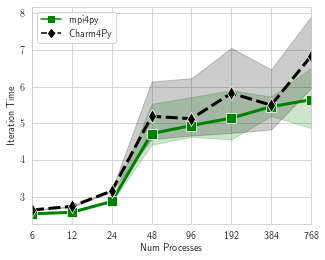

In [161]:
# for np, df in sorted(strong_dfs.items(), key=lambda x: int(x[0])):
#     charm_mean = df[df['framework'] == 'Charm4Py']['Iteration Time'].mean()
#     mpi_mean = df[df['framework'] == 'mpi4py']['Iteration Time'].mean()
#     print(f"{np},{charm_mean},{mpi_mean}")
    
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Num Processes", y="Iteration Time", data=weak_df,hue="framework", style="framework",
              palette = ['green','black'],ax=ax,ci=99, markers=['s', 'd'],
              linewidth=3, markersize=10)
ax.legend(loc='upper left')
ax.set_xlim(6, 768)
ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=2)
ax.set_xticks(sorted(set(weak_df['Num Processes']))) 
ax.set_xticklabels(sorted(set(weak_df['Num Processes']))) 

In [65]:
odf2 = pd.read_csv('/home/zane/projects/charm-mpi-compare/data/stencil/2021-08-27_odf/strong_scaling_stdout_cleaned.txt')
odf1 = pd.read_csv('/home/zane/projects/charm-mpi-compare/data/stencil/2021-08-26_scaling/strong_scaling_stdout_cleaned.txt')
odf8 = pd.read_csv('/home/zane/projects/charm-mpi-compare/data/stencil/2021-08-27_odf/strong_scaling_stdout_cleaned_odf8.txt')
odf1['ODF']=1
odf2['ODF']=2
odf8['ODF']=8
                   

odf = pd.concat([odf1, odf2, odf8]).reset_index(drop=True)
set(odf['Number of Processors'])
print(odf1.groupby('Number of Processors').mean())
print(odf2.groupby('Number of Processors').mean())
print(odf8.groupby('Number of Processors').mean())

                      Total Time  ODF
Number of Processors                 
6                      33.061840  1.0
12                     16.000710  1.0
24                      9.448154  1.0
48                      7.458872  1.0
96                      3.765066  1.0
192                     1.906610  1.0
384                     1.025436  1.0
768                     0.510834  1.0
                      Total Time  ODF
Number of Processors                 
6                      32.778279  2.0
12                     16.533548  2.0
24                      9.138132  2.0
48                      7.462716  2.0
96                      3.795862  2.0
192                     1.914994  2.0
384                     1.024498  2.0
768                     0.626737  2.0
                      Total Time  ODF
Number of Processors                 
6                      31.631014  8.0
12                     16.341108  8.0
24                      9.437926  8.0
48                      7.667333  8.0
96          

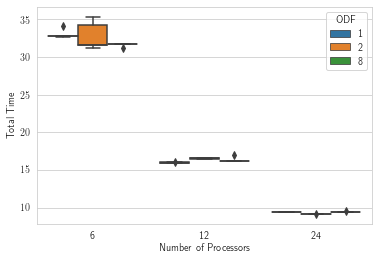

In [72]:
sns.boxplot(x="Number of Processors", y="Total Time", data=odf[(odf["Number of Processors"] < 48)], hue='ODF')
# sns.violinplot(x="Number of Processors", y="Total Time", data=odf2[odf2["Number of Processors"] >= 96])
plt.savefig('odf_stencil_smallprocs.pdf', bbox_inches='tight', dpi=300)

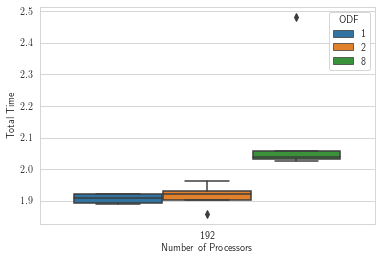

In [73]:
sns.boxplot(x="Number of Processors", y="Total Time", data=odf[(odf["Number of Processors"] == 192)], hue='ODF')
# sns.violinplot(x="Number of Processors", y="Total Time", data=odf2[odf2["Number of Processors"] >= 96])
plt.savefig('odf_stencil_largeprocs.pdf', bbox_inches='tight', dpi=300)

In [41]:
for num_p in sorted(set(odf8['Number of Processors'])):
    o1_p = odf1[odf1['Number of Processors'] == num_p]
    o2_p = odf2[odf2['Number of Processors'] == num_p]
    o8_p = odf8[odf8['Number of Processors'] == num_p]
    print(num_p,scipy.stats.mannwhitneyu(o1_p['Total Time'], o2_p['Total Time']))
    print(num_p,scipy.stats.mannwhitneyu(o1_p['Total Time'], o8_p['Total Time']))

6 MannwhitneyuResult(statistic=20.0, pvalue=0.42857142857142855)
6 MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
12 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
12 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
24 MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
24 MannwhitneyuResult(statistic=20.0, pvalue=0.15079365079365079)
48 MannwhitneyuResult(statistic=10.0, pvalue=0.6904761904761905)
48 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
96 MannwhitneyuResult(statistic=8.0, pvalue=0.42063492063492064)
96 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
192 MannwhitneyuResult(statistic=9.0, pvalue=0.5476190476190477)
192 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)


- It doesn't appear that ODF 2 makes a large enough diffference that can be seen at this sample size. 
- I think that ODF will make a bigger difference at smaller processor counts because the working set of each processor is much larger.
    - At 6 processors beginning with 24576^2 grid, each processor has a piece of the grid that's roughly 0.75GiB
- Try ODF=8 for 6-192 processors. 
- Looks like it may make a difference at lower number of processors, but it appears to be slight. For now, move forward with ODF=1.

In [75]:
mpi_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_mpi\.csv')
charm_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_charm\.csv')
data_basedir = '../data/stencil/2021-08-27_scaling'
strong_dir = f'{data_basedir}/strong_scaling'
weak_dir = f'{data_basedir}/weak_scaling'
strong_files = glob(f'{strong_dir}/*')
weak_files = glob(f'{weak_dir}/*')

In [94]:
strong_df = None
for file in strong_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
#     df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    # Use the process with the highest average iteration time
    df = df.groupby('Process').sum(['Iteration Time', 'Computation Time', 'Communication Time']).reset_index(drop=False)
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['Num Processes'] = nprocs
    # We don't want to sum the number of processes
    df=df.loc[df.reset_index().groupby(['Num Processes'])['Iteration Time'].idxmax()]
    df['framework'] = framework
    if strong_df is None:
        strong_df = df.copy(deep=True)
    else:
        strong_df = pd.concat([strong_df, df]).reset_index(drop=True)

In [95]:
strong_df = strong_df[strong_df['Num Processes'] >= 24]
strong_df_manyprocs = strong_df[strong_df['Num Processes'] > 380]
strong_df_fewprocs = strong_df[strong_df['Num Processes'] < 380]
print(strong_df["Communication Time"].describe())
print(strong_df["Iteration Time"].describe())

count    180.000000
mean       0.257946
std        0.107805
min        0.081799
25%        0.177871
50%        0.247922
75%        0.327034
max        0.666677
Name: Communication Time, dtype: float64
count    180.000000
mean       2.811175
std        3.248213
min        0.152541
25%        0.376673
50%        1.027873
75%        3.788125
max        9.514925
Name: Iteration Time, dtype: float64


/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


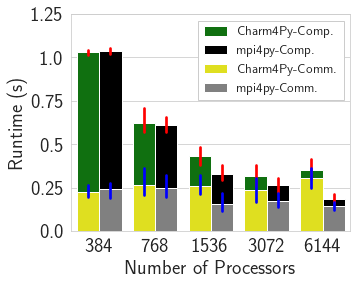

In [57]:
# Stencil2D strong scaling
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))

bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_manyprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Communication Time", data=strong_df_manyprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='blue')
# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_yscale("log", base=10) 
# ax.set_xticklabels([24, 48, 96, 192, 384, 768, 1536, 3072, 6144], rotation=45) 
ax.set_ylabel('Runtime (s)', fontsize=20)
ax.set_xlabel('Number of Processors', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,1.25)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comp.')
labs[0][1].set_label('mpi4py-Comp.')
labs[0][2].set_label('Charm4Py-Comm.')
labs[0][3].set_label('mpi4py-Comm.')
ax.set_yticklabels([0.00, 0.25, 0.50, 0.75, 1.00, 1.25])
ax.legend(fontsize = 13.5, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
plt.savefig('stencil_strong_scaling_largeprocs.pdf', bbox_inches='tight', dpi=300)

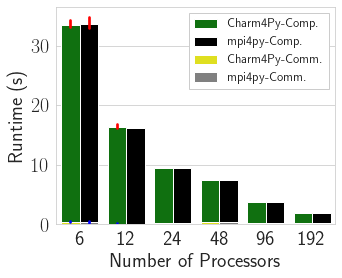

In [93]:
# Stencil2D strong scaling
# TODO: Are the CIs small or is a zorder issue?
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))

bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_fewprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Communication Time", data=strong_df_fewprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='blue')

# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_yscale("log", base=10) 
# ax.set_xticklabels([24, 48, 96, 192, 384, 768, 1536, 3072, 6144], rotation=45) 
ax.set_ylabel('Runtime (s)', fontsize=20)
ax.set_xlabel('Number of Processors', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
# ax.set_ylim(0,10)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comp.')
labs[0][1].set_label('mpi4py-Comp.')
labs[0][2].set_label('Charm4Py-Comm.')
labs[0][3].set_label('mpi4py-Comm.')
# ax.set_yticklabels([0, 2, 4, 6, 8, 10])
ax.legend(fontsize = 12.9, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.8, ncol = 1)
plt.savefig('stencil_strong_scaling_smallprocs.pdf', bbox_inches='tight', dpi=300)

In [52]:
weak_df = None
import seaborn as sns
for file in weak_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
#     df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    # Use the process with the highest average iteration time
    df = df.groupby('Process').mean(['Iteration Time', 'Computation Time', 'Communication Time']).reset_index(drop=False)
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['Num Processes'] = nprocs
    # We don't want to sum the number of processes
    df=df.loc[df.reset_index().groupby(['Num Processes'])['Iteration Time'].idxmax()]
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['framework'] = framework
    if weak_df is None:
        weak_df = df.copy(deep=True)
    else:
        weak_df = pd.concat([weak_df, df]).reset_index(drop=True)
# assert len(weak_df[weak_df['framework'] == "Charm4Py"]) == len(weak_df[weak_df["framework"] == "mpi4py"])

In [53]:
weak_df = weak_df[weak_df['Num Processes'] >= 24]
weak_df_manyprocs = weak_df[weak_df['Num Processes'] > 380]
weak_df_fewprocs = weak_df[weak_df['Num Processes'] < 380]
print(strong_df["Communication Time"].describe())
print(strong_df["Iteration Time"].describe())

count    180.000000
mean       0.257946
std        0.107805
min        0.081799
25%        0.177871
50%        0.247922
75%        0.327034
max        0.666677
Name: Communication Time, dtype: float64
count    180.000000
mean       2.811175
std        3.248213
min        0.152541
25%        0.376673
50%        1.027873
75%        3.788125
max        9.514925
Name: Iteration Time, dtype: float64


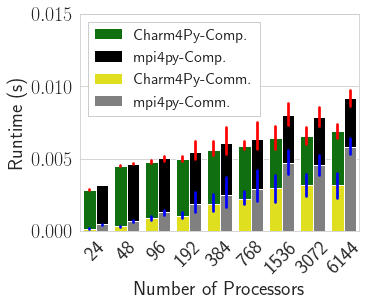

In [56]:
# Stencil2D weak scaling
# These data were discarded because they drew to my attention the fact that the MPI implementation had a slight 
# performance issue which can increase its communication time at very small communication volumes.
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))

bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=weak_df,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Communication Time", data=weak_df,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='blue')
# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_xlim(24, 768)
# ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10) 
ax.set_ylim(0, 0.0150)
ax.set_xticklabels([24, 48, 96, 192, 384, 768, 1536, 3072, 6144], rotation=45) 
ax.set_ylabel('Runtime (s)', fontsize=20)
ax.set_xlabel('Number of Processors', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
# ax.set_ylim(top=10**1)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comp.')
labs[0][1].set_label('mpi4py-Comp.')
labs[0][2].set_label('Charm4Py-Comm.')
labs[0][3].set_label('mpi4py-Comm.')
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
# plt.savefig('stencil_strong_scaling.pdf', bbox_inches='tight', dpi=300)

In [101]:
weak_df[weak_df["Num Processes"] == 6144]

,Num Processes,Process,Iteration,Iteration Time,Communication Time,Computation Time,framework,Num processes
21,6144,6143,6060,0.834733,0.491242,0.482199,Charm4Py,620544.0
31,6144,6143,6060,0.707663,0.392684,0.520229,mpi4py,NaN
41,6144,6143,6060,0.850814,0.535156,0.510286,Charm4Py,620544.0
52,6144,6143,6060,0.722494,0.398065,0.496287,mpi4py,NaN
69,6144,6143,6060,0.905890,0.540876,0.668010,Charm4Py,620544.0
75,6144,6143,6060,0.696033,0.379479,0.537013,mpi4py,NaN
76,6144,6143,6060,0.766278,0.449749,0.546212,mpi4py,NaN
86,6144,6143,6060,0.732202,0.413125,0.511762,mpi4py,NaN
100,6144,6143,6060,0.858082,0.528635,0.483501,Charm4Py,620544.0
103,6144,6143,6060,0.644138,0.317312,0.448175,mpi4py,NaN
